## Explore data

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib as mpl

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
job_change = pd.read_csv('data/aug_train.csv')

In [7]:
job_change.shape

(19158, 14)

In [8]:
job_change.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [9]:
job_change.nunique(axis=0)

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [10]:
job_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [11]:
job_change.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [12]:
job_change.median()

enrollee_id               16982.500
city_development_index        0.903
training_hours               47.000
target                        0.000
dtype: float64

In [13]:
for column in job_change.columns:
    print(column, 'total:', job_change[column].count())
    print(job_change[column].value_counts())
    print()

enrollee_id total: 19158
2047     1
2692     1
4743     1
27272    1
25225    1
        ..
17682    1
19731    1
29972    1
25878    1
6147     1
Name: enrollee_id, Length: 19158, dtype: int64

city total: 19158
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64

city_development_index total: 19158
0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

gender total: 14650
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

relevent_experience total: 19158
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

enrolled_university total: 18772
no_enrollment       13817
Full time course     

In [14]:
corr = job_change.corr()

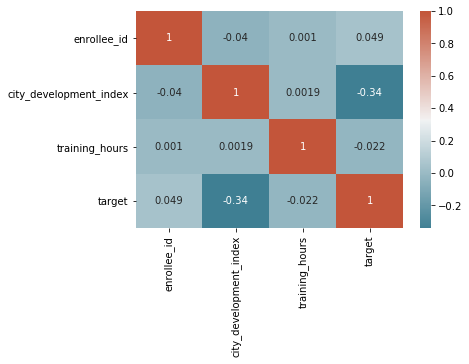

In [15]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [16]:
# def enrolled_university_to_numeric(x):
#     if x != x:
#         return None
#     if x == 'no_enrollment':
#         return 0
#     if x == 'Part time course':
#         return 1
#     if x == 'Full time course':
#         return 2

def education_level_to_numeric(x):
    if x != x:
        return None
    if x == "Primary School":
        return 1
    if x == "High School":
        return 2
    if x == "Graduate":
        return 3
    if x == "Masters":
        return 4
    if x == "Phd":
        return 5

def experience_to_numeric(x):
    if x != x:
        return None
    if x == '>20':
        return 21
    elif x == '<1':
        return 0
    else:
        return int(x)

def company_size_to_numeric(x):
    if x != x:
        return None
    if x == '<10' :
        return 0
    if x == '10/49' :
        return 1
    if x == '50-99' :
        return 2
    if x == '100-500' :
        return 3
    if x == '500-999' :
        return 4
    if x == '1000-4999' :
        return 5
    if x == '5000-9999':
        return 6
    if x == '10000+':
        return 7

def last_new_job_to_numeric(x):
    if x != x:
        return None
    if x == '>4' :
        return 5
    if x == 'never' :
        return 0
    else:
        return int(x)

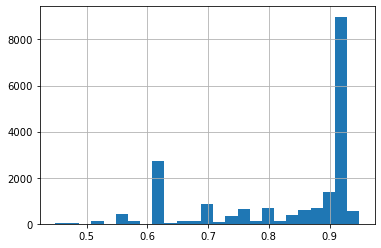

In [17]:
job_change["city_development_index"].hist(bins=25)

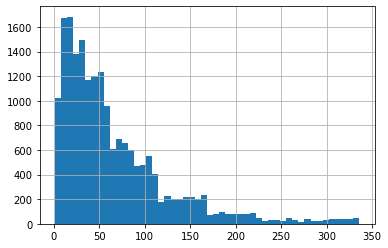

In [18]:
job_change["training_hours"].hist(bins=50)

In [19]:
job_change.groupby("education_level").training_hours.median()

education_level
Graduate          47.0
High School       49.0
Masters           46.0
Phd               47.0
Primary School    41.5
Name: training_hours, dtype: float64

In [20]:
job_change.groupby("education_level").city_development_index.median()

education_level
Graduate          0.910
High School       0.897
Masters           0.897
Phd               0.915
Primary School    0.910
Name: city_development_index, dtype: float64

In [21]:
job_change.groupby("education_level").company_type.value_counts(normalize=True)

education_level  company_type       
Graduate         Pvt Ltd                0.768503
                 Funded Startup         0.082140
                 Public Sector          0.058117
                 Early Stage Startup    0.044649
                 NGO                    0.036884
                 Other                  0.009706
High School      Pvt Ltd                0.765295
                 Public Sector          0.072303
                 Funded Startup         0.060067
                 Early Stage Startup    0.057842
                 NGO                    0.032258
                 Other                  0.012236
Masters          Pvt Ltd                0.740134
                 Public Sector          0.089860
                 Funded Startup         0.070735
                 Early Stage Startup    0.046145
                 NGO                    0.045537
                 Other                  0.007590
Phd              Pvt Ltd                0.504478
                 Public Sector  

In [22]:
job_change.groupby("education_level").target.value_counts(normalize=True)

education_level  target
Graduate         0.0       0.720210
                 1.0       0.279790
High School      0.0       0.804660
                 1.0       0.195340
Masters          0.0       0.785600
                 1.0       0.214400
Phd              0.0       0.859903
                 1.0       0.140097
Primary School   0.0       0.866883
                 1.0       0.133117
Name: target, dtype: float64

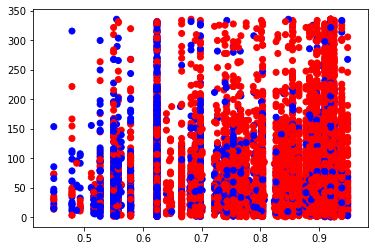

In [23]:
plt.scatter(job_change["city_development_index"], job_change["training_hours"], c=job_change["target"], cmap=mpl.colors.ListedColormap(["red", "blue"]))

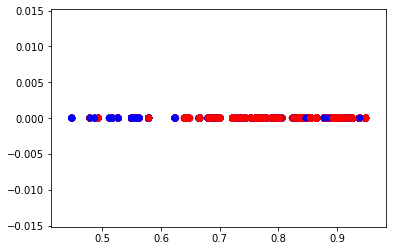

In [24]:
plt.scatter(job_change["city_development_index"], np.zeros(job_change["city_development_index"].shape), c=job_change["target"], cmap=mpl.colors.ListedColormap(["red", "blue"]))

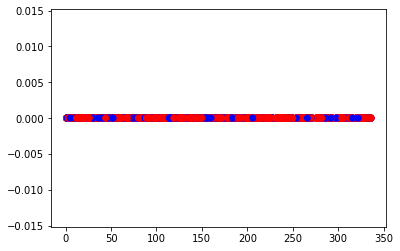

In [25]:
plt.scatter(job_change["training_hours"], np.zeros(job_change["training_hours"].shape), c=job_change["target"], cmap=mpl.colors.ListedColormap(["red", "blue"]))